### Soal Latihan

In [2]:
import base64
print(base64.b64decode("TmFtYQk6IFJpZnFpIE1hdWxhbmEgSmF0aQpOSU0JOiAyMjEwMTE0MDI0NDEKS2VsYXMJOiAwNVRQTE0wMDg=".encode()).decode())

Nama	: Rifqi Maulana Jati
NIM	: 221011402441
Kelas	: 05TPLM008


**Prediksi Tingkat Stress Mahasiswa**

**Rule:**

1. Jika **Jumlah Tugas Banyak**, **Lama Waktu Belajar Lama**, dan **Lama Waktu Tidur Sedikit** maka **Tingkat Stres Tinggi**  
2. Jika **Jumlah Tugas Banyak**, **Lama Waktu Belajar Lama**, dan **Lama Waktu Tidur Cukup** maka **Tingkat Stres Tinggi**  
3. Jika **Jumlah Tugas Banyak**, **Lama Waktu Belajar Singkat**, dan **Lama Waktu Tidur Sedikit** maka **Tingkat Stres Tinggi**  
4. Jika **Jumlah Tugas Banyak**, **Lama Waktu Belajar Singkat**, dan **Lama Waktu Tidur Cukup** maka **Tingkat Stres Rendah**  
5. Jika **Jumlah Tugas Sedikit**, **Lama Waktu Belajar Lama**, dan **Lama Waktu Tidur Sedikit** maka **Tingkat Stres Tinggi**  
6. Jika **Jumlah Tugas Sedikit**, **Lama Waktu Belajar Lama**, dan **Lama Waktu Tidur Cukup** maka **Tingkat Stres Rendah**  
7. Jika **Jumlah Tugas Sedikit**, **Lama Waktu Belajar Singkat**, dan **Lama Waktu Tidur Sedikit** maka **Tingkat Stres Tinggi**  
8. Jika **Jumlah Tugas Sedikit**, **Lama Waktu Belajar Singkat**, dan **Lama Waktu Tidur Cukup** maka **Tingkat Stres Rendah**  

In [3]:
class Fuzzy:
    def __init__(self):
        self.min = 0
        self.max = 0

    def rendah(self,x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return (self.max - x) / (self.max - self.min)
    
    def tinggi(self,x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return (x-self.min)/(self.max - self.min)


    def rev_down(self, f):
        return self.max - f * (self.max - self.min)

    def rev_up(self, f):
        return f * (self.max - self.min) + self.min

In [4]:
class JumlahTugas(Fuzzy):
    def __init__(self):
        self.min = 1
        self.max = 10
    def sedikit(self, x):
        return self.rendah(x)
    def banyak(self, x):
        return self.tinggi(x)

In [5]:
class WaktuBelajar(Fuzzy):
    def __init__(self):
        self.min = 1
        self.max = 3
    def pendek(self, x):
        return self.rendah(x)
    def panjang(self, x):
        return self.tinggi(x)

In [6]:
class WaktuTidur(Fuzzy):
    def __init__(self):
        self.min = 1
        self.max = 8
    def kurang(self, x):
        return self.rendah(x)
    def cukup(self, x):
        return self.tinggi(x)

In [7]:
class TingkatStress(Fuzzy):
    # berdasarkan tingkat cortisol 
    def __init__(self):
        self.min = 5
        self.max = 35

In [8]:
import matplotlib.pyplot as plt
import numpy as np

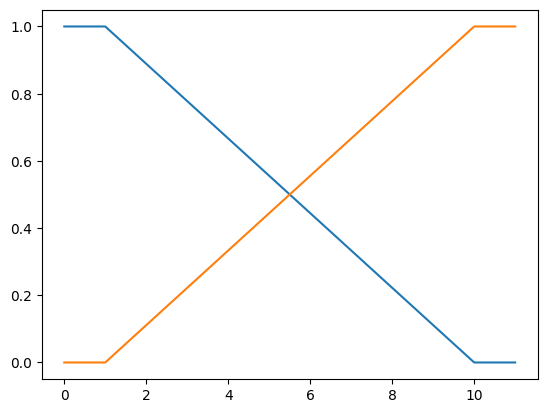

In [9]:
tugas = JumlahTugas()
x = list(range(0, 12))
sedikit = [tugas.sedikit(angka) for angka in x]
banyak = [tugas.banyak(angka) for angka in x]

xpoints = np.array(x)

ypoints = np.array(sedikit)
plt.plot(xpoints, ypoints)

ypoints = np.array(banyak)
plt.plot(xpoints, ypoints)

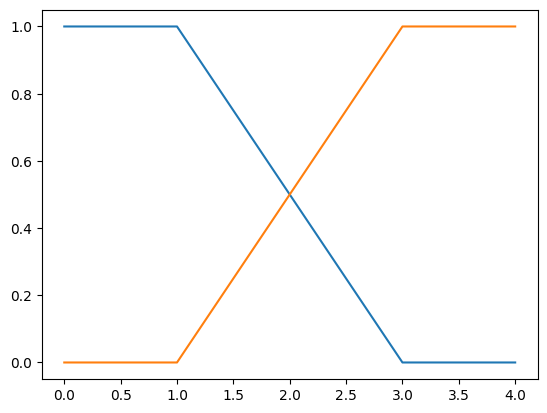

In [10]:
belajar = WaktuBelajar()
x = list(range(0, 5))
sedikit = [belajar.pendek(angka) for angka in x]
banyak = [belajar.panjang(angka) for angka in x]

xpoints = np.array(x)

ypoints = np.array(sedikit)
plt.plot(xpoints, ypoints)

ypoints = np.array(banyak)
plt.plot(xpoints, ypoints)

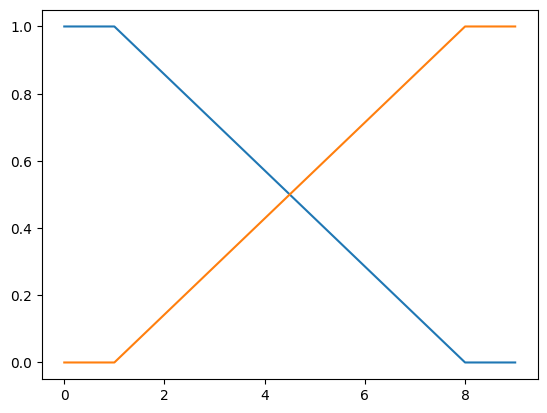

In [11]:
tidur = WaktuTidur()
x = list(range(0, 10))
sedikit = [tidur.kurang(angka) for angka in x]
banyak = [tidur.cukup(angka) for angka in x]

xpoints = np.array(x)

ypoints = np.array(sedikit)
plt.plot(xpoints, ypoints)

ypoints = np.array(banyak)
plt.plot(xpoints, ypoints)

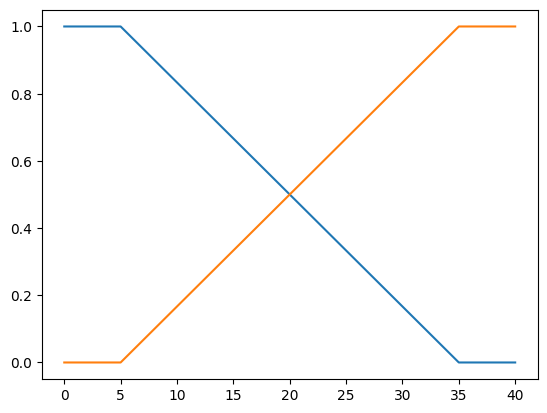

In [12]:
cortisol = TingkatStress()
x = list(range(0, 41))
sedikit = [cortisol.rendah(angka) for angka in x]
banyak = [cortisol.tinggi(angka) for angka in x]

xpoints = np.array(x)

ypoints = np.array(sedikit)
plt.plot(xpoints, ypoints)

ypoints = np.array(banyak)
plt.plot(xpoints, ypoints)

In [13]:
import re

input_text = '''
Jika Jumlah Tugas Banyak, Lama Waktu Belajar Lama, dan Lama Waktu Tidur Sedikit maka Tingkat Stres Tinggi
Jika Jumlah Tugas Banyak, Lama Waktu Belajar Lama, dan Lama Waktu Tidur Cukup maka Tingkat Stres Tinggi
Jika Jumlah Tugas Banyak, Lama Waktu Belajar Singkat, dan Lama Waktu Tidur Sedikit maka Tingkat Stres Tinggi
Jika Jumlah Tugas Banyak, Lama Waktu Belajar Singkat, dan Lama Waktu Tidur Cukup maka Tingkat Stres Rendah
Jika Jumlah Tugas Sedikit, Lama Waktu Belajar Lama, dan Lama Waktu Tidur Sedikit maka Tingkat Stres Tinggi
Jika Jumlah Tugas Sedikit, Lama Waktu Belajar Lama, dan Lama Waktu Tidur Cukup maka Tingkat Stres Rendah
Jika Jumlah Tugas Sedikit, Lama Waktu Belajar Singkat, dan Lama Waktu Tidur Sedikit maka Tingkat Stres Tinggi
Jika Jumlah Tugas Sedikit, Lama Waktu Belajar Singkat, dan Lama Waktu Tidur Cukup maka Tingkat Stres Rendah
'''

pattern = re.compile(r"Jika Jumlah Tugas (\w+), Lama Waktu Belajar (\w+), dan Lama Waktu Tidur (\w+) maka Tingkat Stres (\w+)")
lines = input_text.strip().split("\n")
for line in lines:
    match = pattern.search(line)
    if match:
        group1, group2, group3, group4 = match.groups()
        print(f'    ("{group1}", "{group2}", "{group3}"): "{group4}",')

    ("Banyak", "Lama", "Sedikit"): "Tinggi",
    ("Banyak", "Lama", "Cukup"): "Tinggi",
    ("Banyak", "Singkat", "Sedikit"): "Tinggi",
    ("Banyak", "Singkat", "Cukup"): "Rendah",
    ("Sedikit", "Lama", "Sedikit"): "Tinggi",
    ("Sedikit", "Lama", "Cukup"): "Rendah",
    ("Sedikit", "Singkat", "Sedikit"): "Tinggi",
    ("Sedikit", "Singkat", "Cukup"): "Rendah",


In [14]:
rule_mapping = {
    ("Banyak", "Lama", "Sedikit"): "Tinggi",
    ("Banyak", "Lama", "Cukup"): "Tinggi",
    ("Banyak", "Singkat", "Sedikit"): "Tinggi",
    ("Banyak", "Singkat", "Cukup"): "Rendah",
    ("Sedikit", "Lama", "Sedikit"): "Tinggi",
    ("Sedikit", "Lama", "Cukup"): "Rendah",
    ("Sedikit", "Singkat", "Sedikit"): "Tinggi",
    ("Sedikit", "Singkat", "Cukup"): "Rendah",
}

In [17]:
total_value = 0
total_fuzzy = 0
for k, v in rule_mapping.items():
    tidur = WaktuTidur()
    belajar = WaktuBelajar()
    tugas = JumlahTugas()
    jamTidur = 6
    lamaBelajar = 2
    jumlahTugas = 6

    funcTugas = {
        "Banyak":tugas.banyak,
        "Sedikit":tugas.sedikit,
    }

    funcBelajar = {
        "Lama":belajar.panjang,
        "Singkat":belajar.pendek,
    }

    funcTidur = {
        "Cukup":tidur.cukup,
        "Sedikit":tidur.kurang,
    }
    

    fuzzy_tugas  = funcTugas[k[0]](jumlahTugas)
    fuzzy_belajar =  funcBelajar[k[1]](lamaBelajar)
    fuzzy_tidur =  funcTidur[k[2]](jamTidur )

    cortisol = TingkatStress()
    fuzzy_stress = min(fuzzy_tidur, fuzzy_belajar,fuzzy_tugas)
    stress_value = cortisol.rev_down(fuzzy_stress) if v == "Rendah" else cortisol.rev_up(fuzzy_stress)

    total_value += fuzzy_stress * stress_value
    total_fuzzy += fuzzy_stress
#     print(f"""fuzzy_tugas : {fuzzy_tugas}
# fuzzy_belajar : {fuzzy_belajar}
# fuzzy_tidur : {fuzzy_tidur}
# fuzzy_stress : {fuzzy_stress}
# stress_value : {stress_value}
# total_value : {total_value}
# fuzzy_stress : {fuzzy_stress}""")

print(f"{round(total_value*100)/100} / {round(total_fuzzy*100)/100 }")
result = int(total_value/ total_fuzzy)
print(f"Jadi, Tingkat cortisol siswa sebanyak {result} mcg/dL.")



54.77 / 3.03
Jadi, Tingkat cortisol siswa sebanyak 18 mcg/dL.


2. Buat Slide yang berisikan contoh penghitungan manual dari soal diatas!

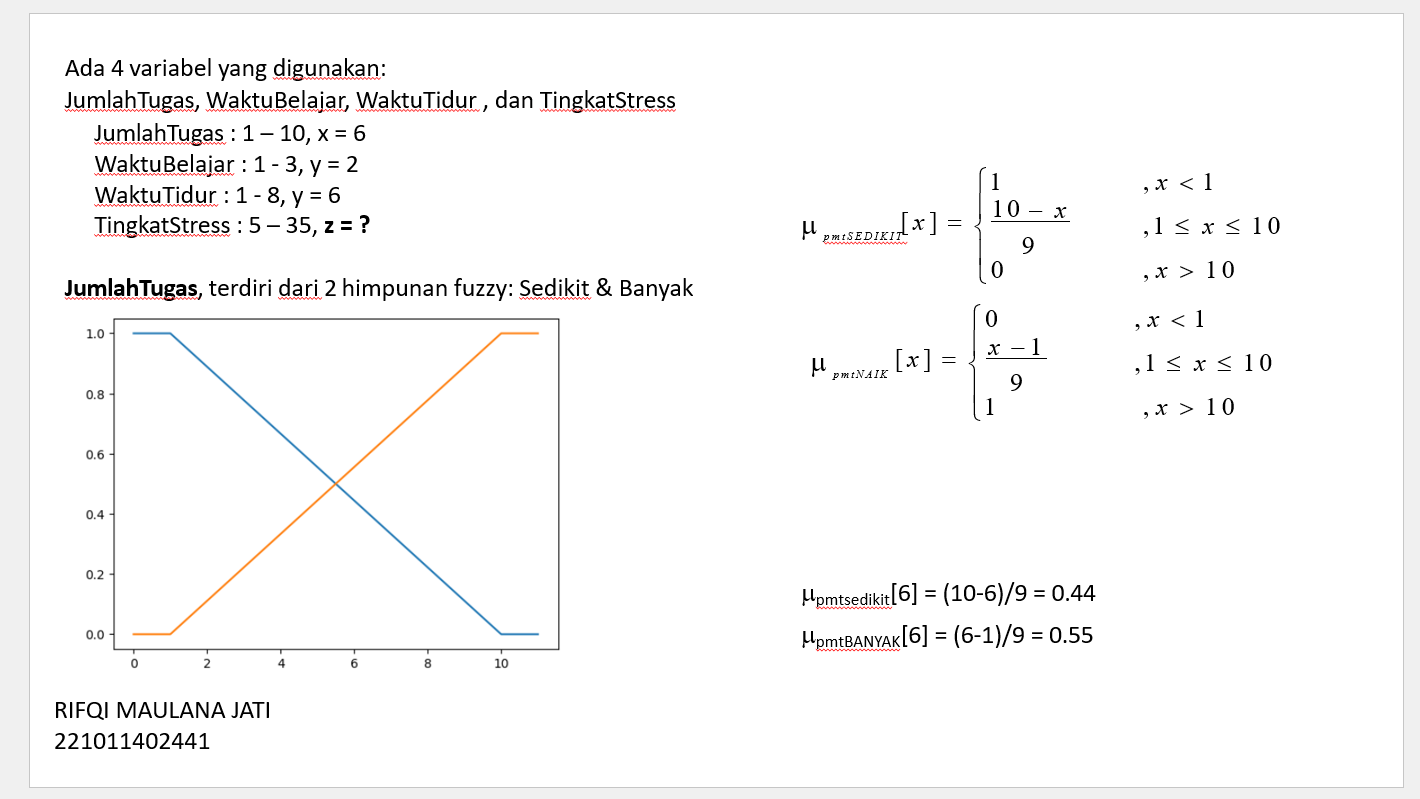

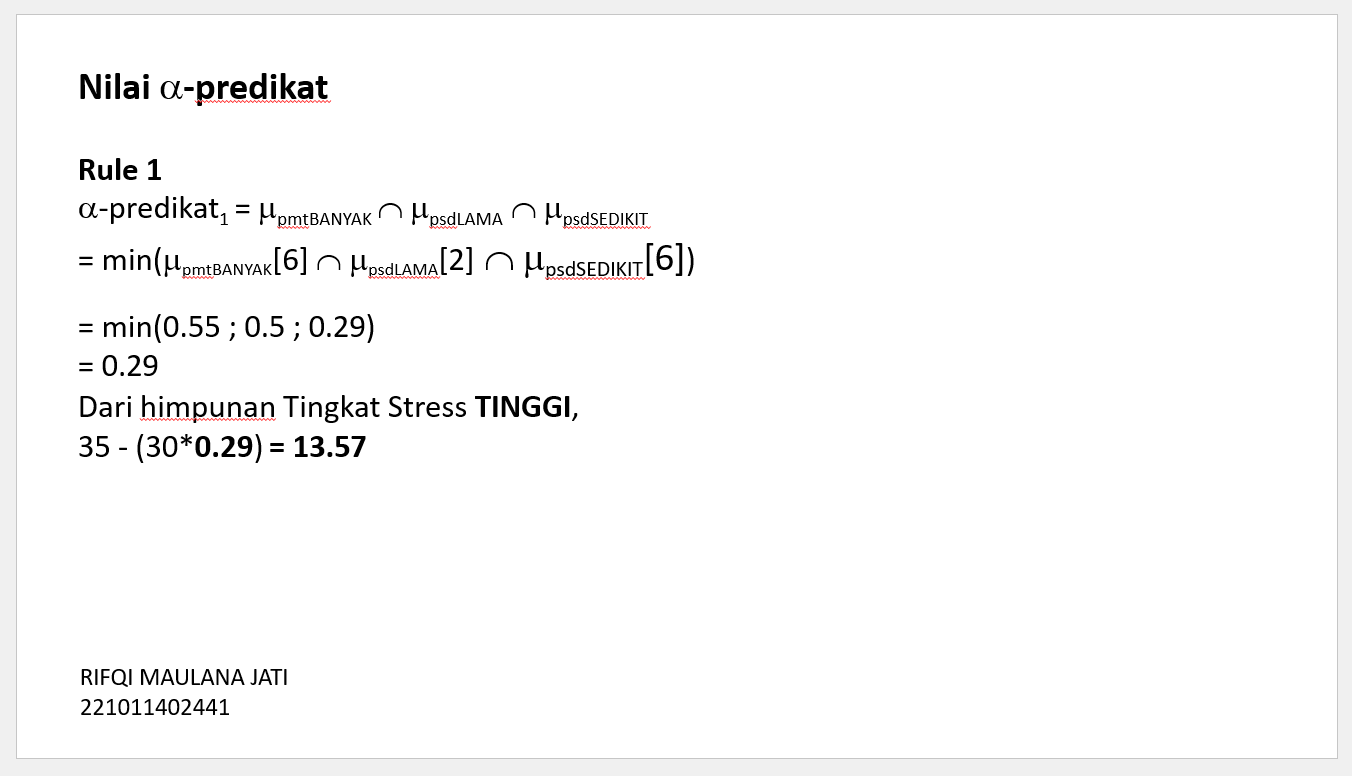

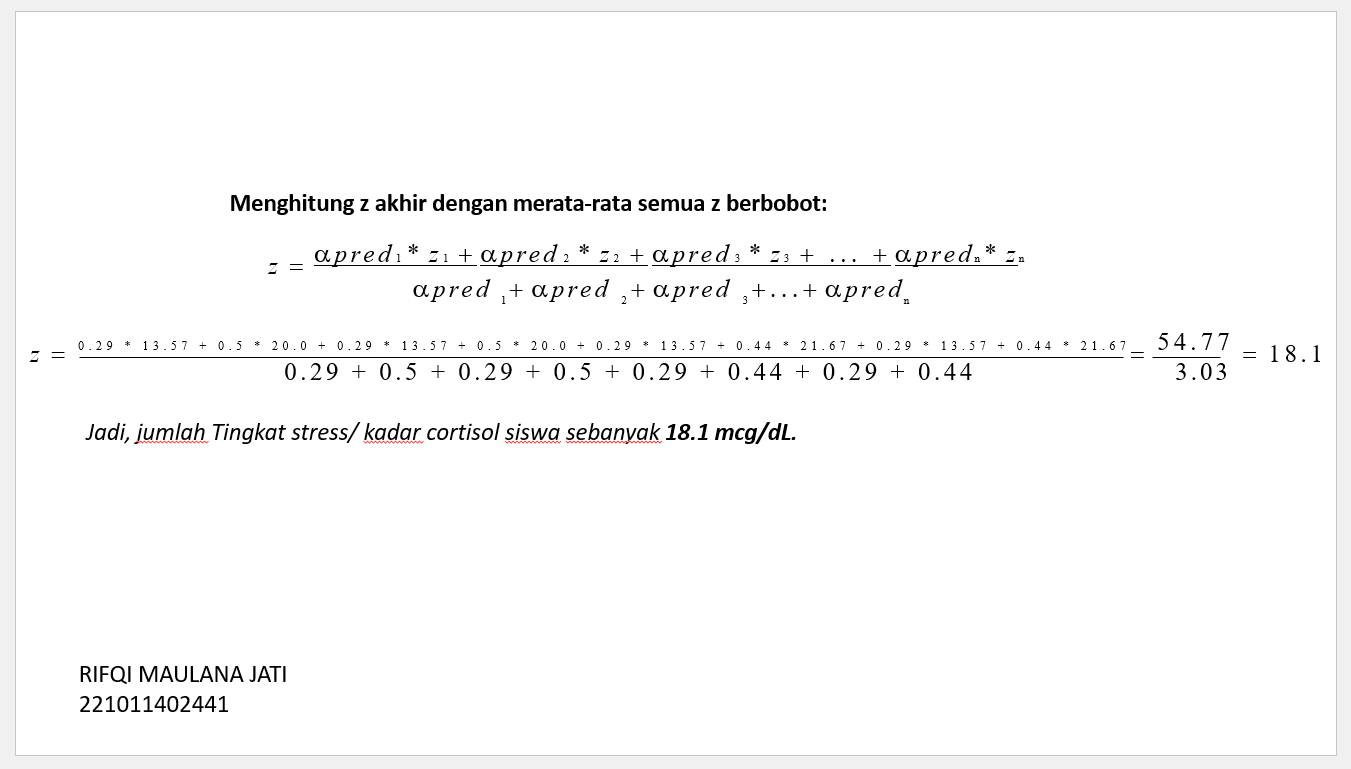

In [18]:
import base64
print(base64.b64decode("TmFtYQk6IFJpZnFpIE1hdWxhbmEgSmF0aQpOSU0JOiAyMjEwMTE0MDI0NDEKS2VsYXMJOiAwNVRQTE0wMDg=".encode()).decode())

Nama	: Rifqi Maulana Jati
NIM	: 221011402441
Kelas	: 05TPLM008
